In [172]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

sample = datasets.load_breast_cancer()
X = sample.data
Y = sample.target

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
svm_results = {}
svm_cms = {}

for kernel in kernels:
    model = SVC(kernel=kernel, C=1.0)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)
    cm = confusion_matrix(Y_test, Y_pred)

    svm_results[kernel] = [accuracy, precision, recall, f1]
    svm_cms[kernel] = cm

    # Print performance results
    print("kernel:", kernel)
    print("Accuracy :" ,accuracy)
    print("Precision:" ,precision)
    print("Recall   :" ,recall)
    print("F1 Score :" ,f1)
    print(" ")

# Homework 3 Results
Hw3_accuracy = 0.9824561403508771
Hw3_precision = 0.9726027397260274
Hw3_recall = 1.0
Hw3_f1 = 0.9861111111111112

Hw3_cm = np.array([[41, 2],
                      [0, 71]])

# Print performance results
print("HW3 Results:")
print("Accuracy :" ,Hw3_accuracy)
print("Precision:" ,Hw3_precision)
print("Recall   :" ,Hw3_recall)
print("F1 Score :" ,Hw3_f1)
print(" ")

kernel: linear
Accuracy : 0.9736842105263158
Precision: 0.9859154929577465
Recall   : 0.9722222222222222
F1 Score : 0.9790209790209791
 
kernel: poly
Accuracy : 0.9122807017543859
Precision: 0.8780487804878049
Recall   : 1.0
F1 Score : 0.935064935064935
 
kernel: rbf
Accuracy : 0.9824561403508771
Precision: 0.9861111111111112
Recall   : 0.9861111111111112
F1 Score : 0.9861111111111112
 
kernel: sigmoid
Accuracy : 0.9298245614035088
Precision: 0.9571428571428572
Recall   : 0.9305555555555556
F1 Score : 0.9436619718309859
 
HW3 Results:
Accuracy : 0.9824561403508771
Precision: 0.9726027397260274
Recall   : 1.0
F1 Score : 0.9861111111111112
 


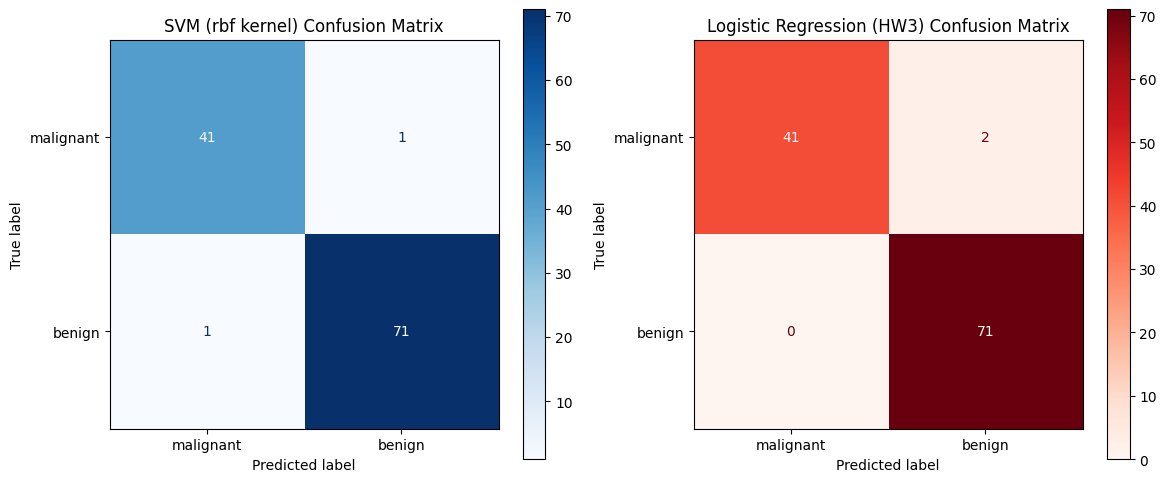

In [ ]:
best_kernel = None
max_accuracy = 0

for kernel in svm_results:
    accuracy = svm_results[kernel][0]
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_kernel = kernel

# Plot both confusion matrices side-by-side
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay(confusion_matrix=svm_cms[best_kernel],
                       display_labels=sample.target_names).plot(ax=ax[0], cmap='Blues')
ax[0].set_title(f"SVM ({best_kernel} kernel) Confusion Matrix")

ConfusionMatrixDisplay(confusion_matrix=Hw3_cm,
                       display_labels=sample.target_names).plot(ax=ax[1], cmap='Reds')
ax[1].set_title("Logistic Regression (HW3) Confusion Matrix")

plt.tight_layout()
plt.show()